Importation des bibliothèques nécessaires

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import itertools
import numpy as np

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random(x):
  test = []
  for _ in range(x):
    random_number = random.randint(1, 40) # genere des nums entre 1 et 40
    test.append(random_number)
  return test

Fonction pour générer des valeurs aléatoires

In [ ]:
def generate_random_client(x):
    test = []
    while len(test) < x:
        random_number = random.randint(1, 40)
        if random_number not in test:
            test.append(random_number)
    return test

Fonction pour générer la population avec un taille donnée

In [ ]:
def generate_population(clients, population_size):
    population = []
    for _ in range(population_size):
        random.shuffle(clients)  # Mélange aléatoire des coordonnées des clients
        population.append(list(clients))  # Ajout d'un individu à la population
    return population

Fonction pour calculer la distance entre paires de clients

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

Fonction pour calculer la matrice de distance entre les clients

In [ ]:
def calculate_distance_matrix(client_coordinates):
    num_clients = len(client_coordinates)
    distance_matrix = [[0] * num_clients for _ in range(num_clients)]

    for i in range(num_clients):
        for j in range(num_clients):
            if i != j:
                x1, y1 = client_coordinates[i]
                x2, y2 = client_coordinates[j]
                distance = calculate_distance(x1, y1, x2, y2)
                distance_matrix[i][j] = distance

    return distance_matrix

Fonction pour calculer la matrice de distance de la consommation d'énergie

In [ ]:
def calculate_energy_consumption(speed, consumption_rate, distance_matrix):
    energy_matrix = []

    for i in range(len(distance_matrix)):
        energy_row = [distance * consumption_rate / speed for distance in distance_matrix[i]]
        energy_matrix.append(energy_row)

    return energy_matrix


Evaluation de la population

In [ ]:
def evaluate_population(client_coordinates, speed, consumption_rate, population):
    distances = []
    energies = []
    fitness_scores = []

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    for individual in population:

        energy = sum(energy_matrix[i][j] for i, j in zip(individual[:-1], individual[1:]))
        fitness_score = 1/(energy)
        energies.append(energy)
        fitness_scores.append(fitness_score)

    return  energies, fitness_scores

Evaluation de chaque individu (fitness score)

In [ ]:
def evaluate_fitness(individual, client_coordinates, speed, consumption_rate):

    distance_matrix = calculate_distance_matrix(client_coordinates)
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)


    energy = sum(energy_matrix[individual[i]][individual[i+1]] for i in range(len(individual) - 1))

    # Fitness score is a combination of distance and energy
    fitness_score = 1/(energy)

    return fitness_score


Séléctionner les parents

In [ ]:

def select_parents(population, num_parents):
    parents = random.sample(population, num_parents)
    return parents

croisement des meilleurs parents pour générer les child (croisement avec deux points aléatoires)

In [ ]:
import time
def crossover(parents, crossover_rate):
    start_time = time.time()
    num_parents = len(parents)
    num_genes = len(parents[0])  # Nombre de gènes dans chaque parent

    children = []

    for i in range(num_parents):
        parent1 = parents[i]
        parent2 = parents[(i + 1) % num_parents]  # Sélection du parent suivant pour assurer une boucle

        if random.random() > crossover_rate:
            children.append(parent1)
            continue

        # Création d'un tableau vide pour stocker les gènes déjà utilisés
        used_genes = set()

        # Génération de deux points de coupure uniques
        point1, point2 = sorted(random.sample(range(1, num_genes - 1), 2))

        # Création de l'enfant en préservant l'ordre des gènes de parent1 et en ajoutant les gènes de parent2
        child = []
        for gene in parent1[:point1]:
            child.append(gene)
            used_genes.add(gene)

        for gene in parent2:
            if gene not in used_genes:
                child.append(gene)
                used_genes.add(gene)

        for gene in parent1[point2:]:
            if gene not in used_genes:
                child.append(gene)
                used_genes.add(gene)

        children.append(child)
    end_time = time.time()
    execution_time = (end_time - start_time) * 1000  # Convertir en millisecondes
    print("Temps d'exécution de crossover:", execution_time, "millisecondes")
    return children


Fonction de mutation qui permet de changer les position des gènes trouver dans child de manière aléatoire

In [ ]:
def mutation(children, mutation_rate):
    mutated_children = []

    for child in children:
        if random.random() <= mutation_rate:
            mutated_child = list(child)  # Convertir en une liste modifiable

            # Générer deux positions de gènes uniques
            gene_pos1, gene_pos2 = random.sample(range(len(child)), 2)

            # Échanger les positions des gènes
            mutated_child[gene_pos1], mutated_child[gene_pos2] = mutated_child[gene_pos2], mutated_child[gene_pos1]

            mutated_children.append(mutated_child)
        else:
            mutated_children.append(child)

    return mutated_children

Données (paramètres d'entrées)

In [ ]:
clients = generate_random_client(40) # les indices des clients
population_size = 50 # taille de la population
client_coordinates = {0: (0, 0), 1: (91, 29), 2: (93, 87),  3: (79, 36), 4: (17, 42), 5: (21, 5), 6: (40, 9), 7: (44, 42), 8: (23, 40),  9: (35, 34), 10: (77, 54), 11: (88, 31), 12: (51, 16), 13: (54, 84), 14: (60, 5), 15: (33, 69), 16: (47, 3), 17: (68, 78), 18: (83, 19), 19: (74, 57), 20: (38, 55), 21: (80, 92), 22: (42, 5), 23: (21, 52), 24: (94, 21), 25: (1, 22), 26: (53, 100), 27: (53, 93), 28: (61, 7), 29: (88, 17), 30: (12, 26),  31: (81, 32), 32: (38, 83), 33: (47, 64), 34: (46, 51), 35: (57, 64), 36: (18, 70), 37: (80, 87), 38: (7, 72), 39: (42, 48), 40: (64, 42)}
demands = [8, 22, 27, 1, 5, 28, 2, 5, 8, 28, 8, 9, 27, 20, 31, 19, 11, 27, 20, 26, 21, 39, 19, 24, 27, 29, 13, 2, 5, 4, 38, 2, 20, 21, 5, 10, 19, 22, 14, 15] # les demandes des clients
capacity = (2/3) * sum(demands) # capacité maximale
k = 6
num_parents = 2 # nombre de parents choisi
crossover_rate = 0.8 # taux de croisement
mutation_rate = 0.2 # taux de mutation
num_generations = 100 # nombre de génération
speed = 80 # vitesse
consumption_rate = 0.1  # consommation spécifique en kWh/km

In [ ]:
population = generate_population(clients, population_size)
# Afficher chaque individu
for individual in population:
    print(individual)

distance_matrix = calculate_distance_matrix(client_coordinates)
for row in distance_matrix:
  print(row)

energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)
for row in energy_matrix:
  print(row)

energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

for i in range(len(population)):
    print(f"Individu {i+1} -  Consommation d'énergie : {energies[i]}, Fitness Score : {fitness_scores[i]}")

parents = select_parents(population, num_parents)
for parent in parents:
    print("Parent:", parent )

children  = crossover(parents, crossover_rate)
for child in children:
    print("child:", child)

mutated_children = mutation(children, mutation_rate)
for child_mutate in mutated_children:
  print("child mutate:", child_mutate)

[20, 34, 6, 35, 24, 1, 37, 19, 25, 2, 36, 12, 26, 31, 8, 11, 22, 17, 18, 23, 21, 30, 27, 38, 28, 9, 3, 7, 15, 32, 4, 14, 5, 10, 33, 39, 29, 40, 16, 13]
[29, 23, 32, 15, 16, 5, 37, 28, 21, 34, 20, 9, 3, 35, 30, 22, 14, 8, 36, 2, 25, 40, 31, 4, 12, 1, 6, 19, 26, 13, 33, 11, 17, 24, 38, 10, 7, 18, 27, 39]
[36, 8, 12, 37, 29, 32, 31, 34, 15, 33, 20, 18, 39, 40, 6, 11, 27, 30, 16, 14, 28, 19, 13, 35, 26, 7, 38, 1, 5, 24, 4, 23, 3, 22, 25, 9, 10, 17, 21, 2]
[34, 22, 5, 23, 40, 6, 28, 33, 25, 11, 15, 20, 24, 35, 38, 16, 26, 10, 21, 29, 31, 7, 32, 9, 17, 8, 4, 12, 39, 14, 27, 19, 18, 1, 13, 30, 2, 37, 3, 36]
[21, 4, 1, 10, 20, 37, 17, 39, 26, 18, 33, 31, 19, 30, 22, 38, 8, 5, 2, 16, 40, 28, 23, 34, 25, 7, 3, 27, 35, 13, 14, 15, 12, 9, 32, 36, 11, 6, 24, 29]
[3, 5, 36, 23, 11, 7, 38, 30, 31, 22, 34, 39, 20, 40, 14, 13, 35, 8, 12, 24, 37, 33, 2, 25, 27, 17, 26, 1, 19, 15, 9, 16, 32, 10, 18, 21, 4, 29, 28, 6]
[30, 6, 15, 18, 26, 27, 22, 7, 38, 11, 40, 24, 28, 34, 12, 25, 23, 1, 2, 4, 17, 31, 19, 

Exécution de l'algorithme génétique (trouver le meilleur individu avec leur score  )

In [ ]:
import random

def execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations, speed, consumption_rate):

    # Générer la population initiale
    population = generate_population(clients, population_size)

    # Calculer la matrice des distances
    distance_matrix = calculate_distance_matrix(client_coordinates)

    # Calculer la matrice de consommation d'énergie
    energy_matrix = calculate_energy_consumption(speed, consumption_rate, distance_matrix)

    # Boucle sur le nombre de générations
    for generation in range(num_generations):
        # Évaluer la population
        energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

        # Sélectionner les parents
        parents = select_parents(population, num_parents)

        # Effectuer le croisement
        children = crossover(parents, crossover_rate)

        # Effectuer la mutation
        mutated_children = mutation(children, mutation_rate)

        # Remplacer la population par les enfants mutés
        population = mutated_children

    # Évaluer la population finale
    energies, fitness_scores = evaluate_population(client_coordinates, speed, consumption_rate, population)

    # Trouver l'indice de l'individu avec le score de fitness minimum parmi les enfants mutés
    best_index = fitness_scores.index(min(fitness_scores))

    # Renvoyer le meilleur individu parmi les enfants mutés
    return population[best_index]



Affichage du meilleur individu

In [ ]:
best_individual = execute_genetic_algorithm(clients, population_size, demands, capacity, num_parents, crossover_rate, mutation_rate, num_generations, speed, consumption_rate)
print("Meilleur individu:", best_individual)


Temps d'exécution de crossover: 0.051021575927734375 millisecondes
Temps d'exécution de crossover: 0.041961669921875 millisecondes
Temps d'exécution de crossover: 0.07653236389160156 millisecondes
Temps d'exécution de crossover: 0.07033348083496094 millisecondes
Temps d'exécution de crossover: 0.057220458984375 millisecondes
Temps d'exécution de crossover: 0.04482269287109375 millisecondes
Temps d'exécution de crossover: 0.0457763671875 millisecondes
Temps d'exécution de crossover: 0.06461143493652344 millisecondes
Temps d'exécution de crossover: 0.0705718994140625 millisecondes
Temps d'exécution de crossover: 0.19288063049316406 millisecondes
Temps d'exécution de crossover: 0.06318092346191406 millisecondes
Temps d'exécution de crossover: 0.04863739013671875 millisecondes
Temps d'exécution de crossover: 0.06699562072753906 millisecondes
Temps d'exécution de crossover: 0.045299530029296875 millisecondes
Temps d'exécution de crossover: 0.0045299530029296875 millisecondes
Temps d'exécuti

Fonction de découdage du meilleur individu retourner par l'algorithme génétique et qui donne les routes avec leur distance, leur consommation d'enrgie

In [ ]:
def decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k):
    routes = []
    current_route = [0]  # Commence chaque route par le dépôt
    current_demand = 0
    current_distance = 0
    current_energy_consumption = 0

    # Initialise la liste des clients non visités
    unvisited_clients = set(best_individual)

    # Parcours les clients du meilleur individu dans l'ordre
    for client in best_individual:
        # Si le client est déjà visité ou s'il s'agit du dépôt, passe au suivant
        if client == 0 or client not in unvisited_clients:
            continue

        # Si ajouter le client ne viole pas les contraintes
        if current_demand + demands[client - 1] <= capacity and len(current_route) <= k + 1:
            current_route.append(client)
            current_demand += demands[client - 1]
            current_distance += distance_matrix[current_route[-2]][client]
            current_energy_consumption += energy_matrix[current_route[-2]][client]
            unvisited_clients.remove(client)
        else:
            # Termine la route actuelle et démarre une nouvelle route
            current_route.append(0)  # Termine la route actuelle par le dépôt
            current_distance += distance_matrix[current_route[-2]][0]
            current_energy_consumption += energy_matrix[current_route[-2]][0]
            routes.append((current_route, current_distance, current_energy_consumption))
            current_route = [0, client]  # Démarre une nouvelle route avec le dépôt et le client
            current_demand = demands[client - 1]
            current_distance = distance_matrix[0][client]
            current_energy_consumption = energy_matrix[0][client]
            unvisited_clients.remove(client)

    # Termine la dernière route
    current_route.append(0)  # Termine la dernière route par le dépôt
    current_distance += distance_matrix[current_route[-2]][0]
    current_energy_consumption += energy_matrix[current_route[-2]][0]
    routes.append((current_route, current_distance, current_energy_consumption))

    return routes

Affichage des routes

In [ ]:
routes = decode_best_individual(best_individual, demands, capacity, distance_matrix, energy_matrix, k)
total_distance = 0
total_energy_consumption = 0

for route, distance, energy_consumption in routes:
    print("Route:", route)
    print("Distance:", distance)
    print("Energy Consumption:", energy_consumption)
    print()

    total_distance += distance
    total_energy_consumption += energy_consumption

print("Total Distance:", total_distance)
print("Total Energy Consumption:", total_energy_consumption)

Route: [0, 6, 38, 13, 30, 36, 4, 9, 0]
Distance: 373.15566932239886
Energy Consumption: 0.46644458665299865

Route: [0, 19, 34, 1, 3, 33, 16, 14, 0]
Distance: 362.90721630568834
Energy Consumption: 0.4536340203821104

Route: [0, 31, 28, 23, 2, 20, 11, 35, 0]
Distance: 509.44508250897024
Energy Consumption: 0.6368063531362128

Route: [0, 18, 40, 7, 22, 26, 32, 24, 0]
Distance: 470.20368270388326
Energy Consumption: 0.5877546033798541

Route: [0, 25, 8, 27, 12, 21, 15, 10, 0]
Distance: 462.58084960087155
Energy Consumption: 0.5782260620010894

Route: [0, 39, 5, 37, 29, 17, 0]
Distance: 450.78476113209024
Energy Consumption: 0.5634809514151128

Total Distance: 2629.077261573903
Total Energy Consumption: 3.286346576967378


plot des routes

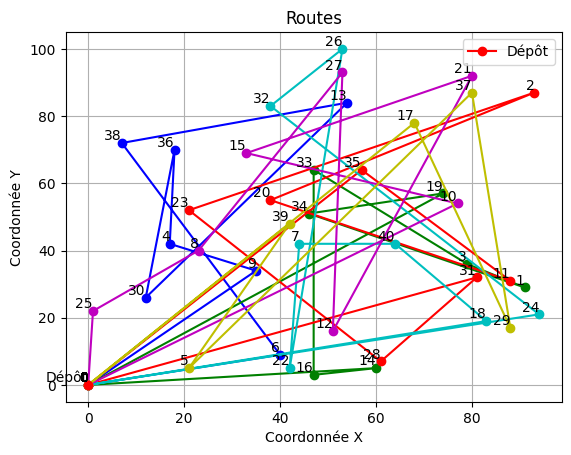

In [ ]:
import matplotlib.pyplot as plt

def plot_routes(routes, distance_matrix):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Liste de couleurs prédéfinies

    for i, (route, _, _) in enumerate(routes):
        x_coords = []
        y_coords = []
        for client in route[:]:
            x = client_coordinates[client][0]
            y = client_coordinates[client][1]
            x_coords.append(x)
            y_coords.append(y)
            plt.plot(x, y, marker='o', color=colors[i % len(colors)])  # Attribution de la couleur

            plt.text(x, y, str(client), verticalalignment='bottom', horizontalalignment='right')

        plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], color=colors[i % len(colors)])

    # Affichage du dépôt
    depot_x = client_coordinates[0][0]
    depot_y = client_coordinates[0][1]
    plt.plot(depot_x, depot_y, marker='o', color='red', label='Dépôt')
    plt.text(depot_x, depot_y, 'Dépôt', verticalalignment='bottom', horizontalalignment='right')

    plt.xlabel('Coordonnée X')
    plt.ylabel('Coordonnée Y')
    plt.title('Routes')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_routes(routes, distance_matrix)
